<font size="28px">

In [1]:
# The polygon midpoint puzzle
# Suppose I assigned the following Matlab
# task:
#
# Write a program to create a polygon
# from a random set of point (any
# sort of craziness allowed with
# crossing lines, concave shapes, etc.!)
#
# Show what happens to the polygon
# as you iteratively replace update
# the polygon by replacing each
# point with its midpoint.
using Plots

[Plots.jl] Initializing backend: pyplot



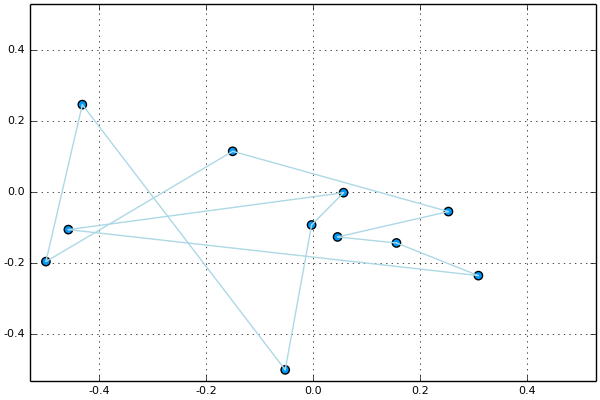

In [2]:
function plot_polygon(x,y)
# PLOT_POLYGON Draw a close polygon with vertices from x, y

  if maxabs(x) > 0.5
      x = 0.5*(x/maxabs(x)); # scale so x max is 0.5;
  end
  if maxabs(y) > 0.5
    y = 0.5*(y/maxabs(y)); # scale so x max is 0.5;
  end
  scatter(x,y); # draw the points

  # draw the lines
  npts = length(x);
  for i=1:npts-1
        plot!([x[i], x[i+1]], [y[i], y[i+1]], color=:lightblue);
  end
  # draw the last line
  plot!([x[length(x)], x[1]], [y[length(y)], y[1]], color=:lightblue);

  # set the limits on the plot
    plot!(xlim=(-0.5,0.5))
    plot!(ylim=(-0.5,0.5))
    plot!(legend=false)

end
n = 11;           # use a 11 point polygon.
x = randn(n,1)
y = randn(n,1)
plot_polygon(x,y)



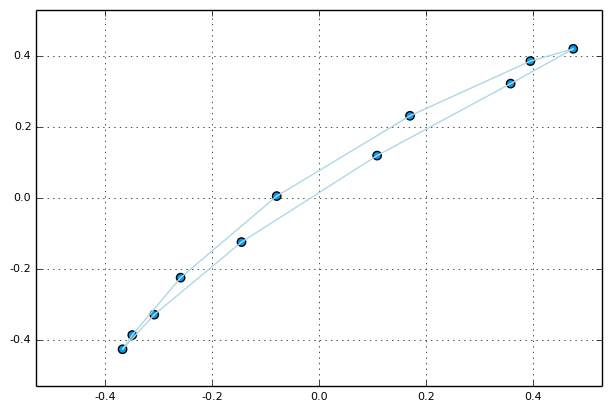

INFO: Saved animation to /home/juser/CS314-2016/tmp.gif


Plots.AnimatedGif("/home/juser/CS314-2016/tmp.gif")

In [7]:
## With a for loop and normalized to keep it from shrinking
n = 11
x = randn(n,1)
y = randn(n,1)
x = x - sum(x)/n # center on the origin
y = y - sum(y)/n
x = x/norm(x) # rescale
y = y/norm(y)
niter = 30
anim = @animate for iter=1:niter
    xnew = zeros(n,1)
    ynew = zeros(n,1)
    for i=1:n-1
        xnew[i] = (x[i] + x[i+1])/2
        ynew[i] = (y[i] + y[i+1])/2
    end
    # handle the stinker at the end
    xnew[n] = (x[n]+x[1])/2
    ynew[n] = (y[n]+y[1])/2

    xnew = xnew/norm(xnew)
    ynew = ynew/norm(ynew)

    plot_polygon(xnew,ynew)

    x = xnew;
    y = ynew;

end

gif(anim, "tmp.gif", fps = 10)

## It turns out you can prove this ALWAYS
# looks like an ellipse at 45 degs!
# http://www.cs.cornell.edu/cv/ResearchPDF/EllipsePoly.pdf